In [2]:
from lib.simulation import approximate_sigma_mgf, matrix_to_eigenvalues

import random

random.seed(int(0))

# I think there is a faster way to find eigenvalues directly in this case, but this is an example of how this should work
def random_matrix(n):
    index = Integer(random.randrange(0, n))
    angle = (2 * pi * index) / n
    return matrix([[cos(angle), -sin(angle)], [sin(angle), cos(angle)]])
    
# We are looking at C_n
n = 30

expectations, estimation_stds, sample_stds = approximate_sigma_mgf(lambda: matrix_to_eigenvalues(random_matrix(n)), num_eigenvalues=2, partition_size=5, stopping_std=1, max_num_samples=10000)
print(expectations)
print(sample_stds)

Processing sample 100/10000
Sample variance for [1] is 2.1355152604831864; estimate variance is 0.213551526048319
Sample variance for [2] is 1.9671698722682507; estimate variance is 0.196716987226825
Sample variance for [1, 1] is 1.9671698722682507; estimate variance is 0.196716987226825
Sample variance for [3] is 4.3472246192758055; estimate variance is 0.434722461927581
Sample variance for [2, 1] is 10.954370171133771; estimate variance is 1.09543701711338
Processing sample 200/10000
Sample variance for [1] is 2.029320393471185; estimate variance is 0.143494621142363
Sample variance for [2] is 1.9663541231506367; estimate variance is 0.139042233469394
Sample variance for [1, 1] is 1.966354123150619; estimate variance is 0.139042233469393
Sample variance for [3] is 3.9808042859538166; estimate variance is 0.281485370517442
Sample variance for [2, 1] is 10.032717776245851; estimate variance is 0.709420277331426
Sample variance for [1, 1, 1] is 20.14327205348024; estimate variance is 1.

Text(0.5, 1.0, 'Variance of $X_{h_\\tau}$ for each partition $\\tau$')

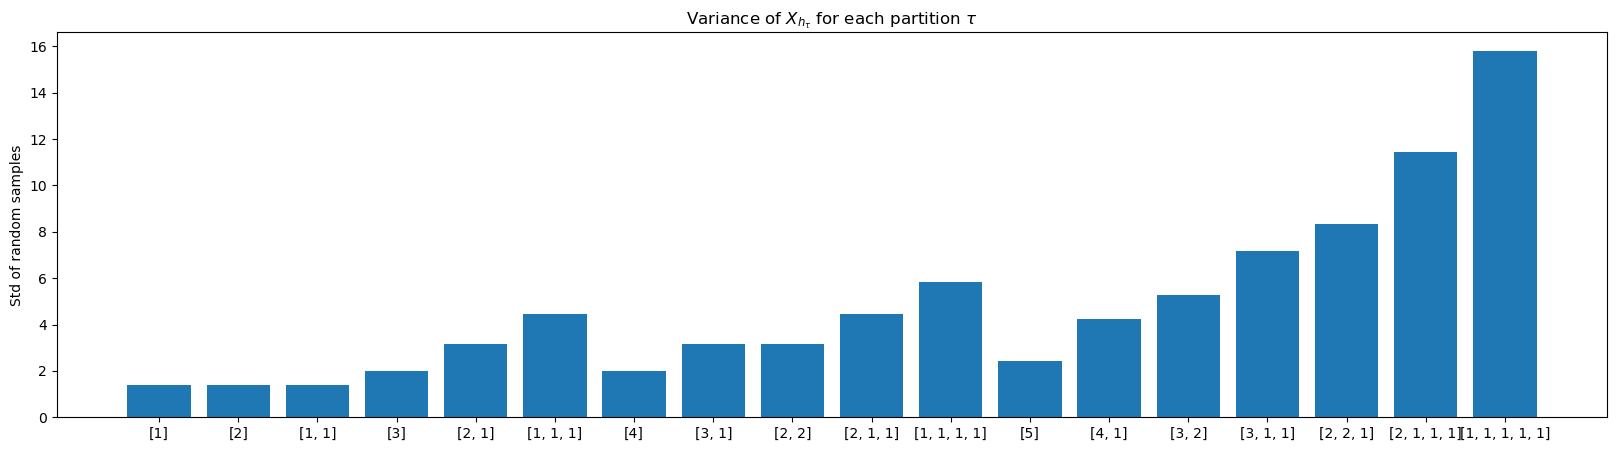

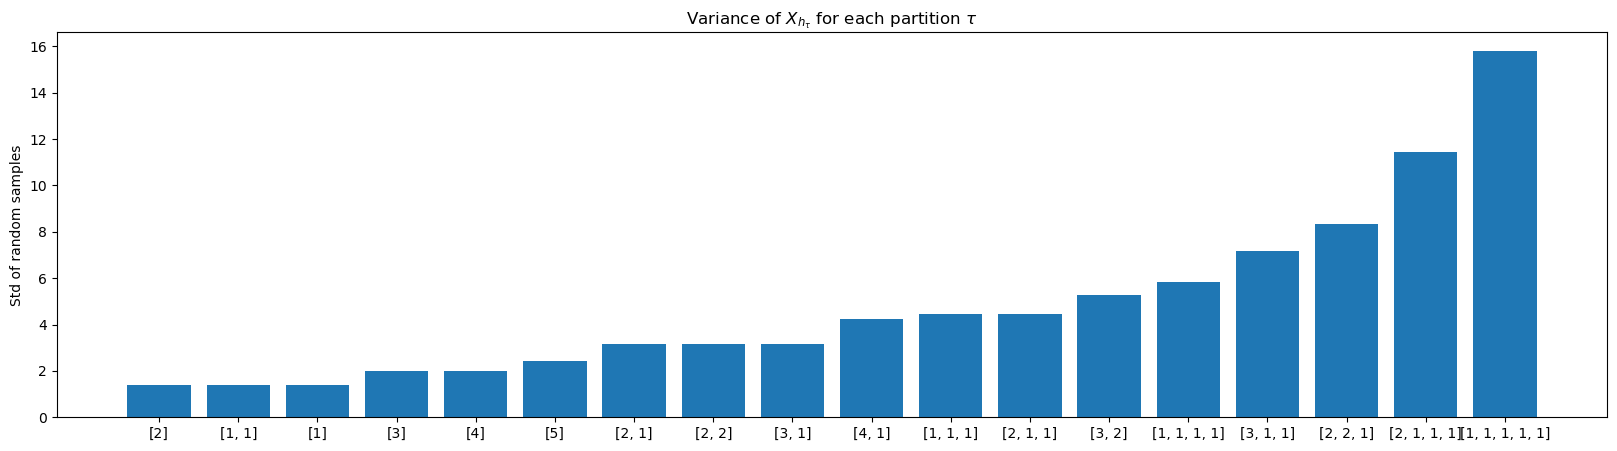

In [21]:
import matplotlib.pyplot as plt


# Increase plot size
plt.rcParams['figure.figsize'] = [20, 5]
fig, ax = plt.subplots()


vals = [(str(p), std) for p, std in sample_stds.items()]

partitions, stds = zip(*vals)
# bar_labels = ['red', 'blue', '_red', 'orange']
# bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(partitions, stds)

ax.set_ylabel("Std of random samples")
ax.set_title(r"Variance of $X_{h_\tau}$ for each partition $\tau$")


# Same, but re-sorted by std length

fig, ax = plt.subplots()

partitions, stds = zip(*sorted(
    vals,
    key=lambda t: t[1]
))
# bar_labels = ['red', 'blue', '_red', 'orange']
# bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(partitions, stds)

ax.set_ylabel("Std of random samples")
ax.set_title(r"Variance of $X_{h_\tau}$ for each partition $\tau$")